$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge Nº5 | Clustering}$$


_Integrantes:_

_Integrantes:_

* _Luis Revilla_

* _Sebastián Ríos_

* _Emilio Ochoa_

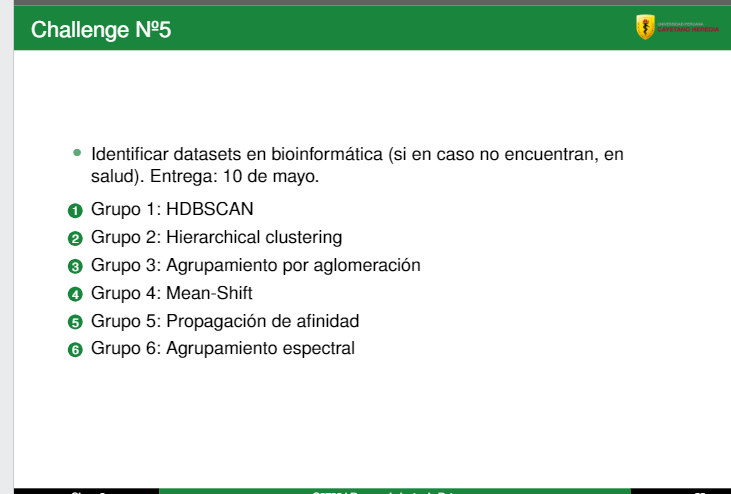

## $Justificación:$

El repositorio elegido para el desarrollo del challenge N°5 es el llamado "gMice Protein Expression Data Set" presente en el repositorio UCI Machine Learning. Analizar este dataset es importante ya que contiene información relevante sobre la expresión de proteínas en ratones con síndrome de Down, lo que puede ayudar a entender mejor las características y el desarrollo de esta condición genética en humanos. Además, este conjunto de datos permite estudiar el efecto de la droga memantina en la capacidad de aprendizaje de ratones con síndrome de Down, lo que puede tener implicaciones importantes en el desarrollo de tratamientos para mejorar la calidad de vida de personas con esta condición. 

Se descargó la data desde Google Drive, mediante el comando !gdown.

In [ ]:
!gdown 1BLVHckdm-mS84LJYuPdVCquOCY7GFtoC

Downloading...
From: https://drive.google.com/uc?id=1BLVHckdm-mS84LJYuPdVCquOCY7GFtoC
To: /content/Data_Cortex_Nuclear.xls
100% 1.63M/1.63M [00:00<00:00, 178MB/s]


## $Análisis$ $exploratorio$ $de$ $datos$ $(EDA)$ $y$ $Preprocesamiento$ $:$ 

A continuación, se importó librerias como pandas, numpy y seaborn. Se cargaron en una variable denominada df la data descargada correspondiente. El ID es la columna 0, conocida como "MouseID"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_excel("Data_Cortex_Nuclear.xls")

De esta manera, se tiene las siguientes expresiones genicas.

In [ ]:
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


A continuación, se muestra la información del dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [ ]:
# Verificamos los nulos
df.isnull().sum().sum()

1396

In [ ]:
# Seccionamos la data, específicamente tomando las variables numéricas
X=df.iloc[:,1:-4]
X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


In [ ]:
# Imputamos data para los valores NaN

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X=imputer.fit_transform(X)
X=pd.DataFrame(data=X,columns=df.iloc[:,1:-4].columns)
X['Class']=df.iloc[:,-1]
df=X

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1080 non-null   float64
 1   ITSN1_N          1080 non-null   float64
 2   BDNF_N           1080 non-null   float64
 3   NR1_N            1080 non-null   float64
 4   NR2A_N           1080 non-null   float64
 5   pAKT_N           1080 non-null   float64
 6   pBRAF_N          1080 non-null   float64
 7   pCAMKII_N        1080 non-null   float64
 8   pCREB_N          1080 non-null   float64
 9   pELK_N           1080 non-null   float64
 10  pERK_N           1080 non-null   float64
 11  pJNK_N           1080 non-null   float64
 12  PKCA_N           1080 non-null   float64
 13  pMEK_N           1080 non-null   float64
 14  pNR1_N           1080 non-null   float64
 15  pNR2A_N          1080 non-null   float64
 16  pNR2B_N          1080 non-null   float64
 17  pPKCAB_N      

In [ ]:
# Verificamos que ya no hayan missings
df.isnull().sum().sum()

0

Gráfico de feature importance del conjunto de datos respecto a la clase

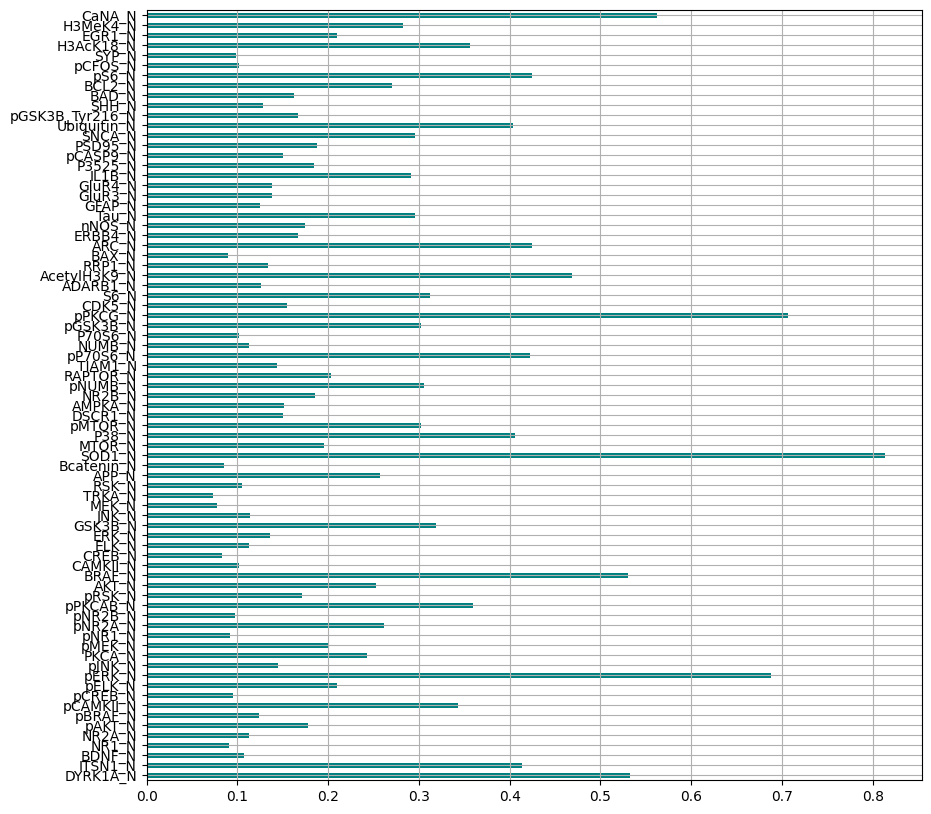

In [ ]:
from sklearn.feature_selection import mutual_info_classif

plt.figure(figsize=(10,10))
importances=mutual_info_classif(df.iloc[:,:-1],df.iloc[:,-1],discrete_features=False)
feat_importances=pd.Series(importances,df.columns[:-1])
feat_importances.plot(kind='barh',color='teal')
plt.grid()
plt.show()

In [ ]:
# Seleccionamos las variables de mayor importancia
df_features_importance=df[["DYRK1A_N","SOD1_N", "pPKCG_N", "pERK_N", "CaNA_N","Class"]]

In [ ]:
df_features_importance

,DYRK1A_N,SOD1_N,pPKCG_N,pERK_N,CaNA_N,Class
0,0.503644,0.369510,1.443091,0.687906,1.675652,c-CS-m
1,0.514617,0.342279,1.439460,0.695006,1.743610,c-CS-m
2,0.509183,0.343696,1.524364,0.677348,1.926427,c-CS-m
3,0.442107,0.344509,1.612382,0.583277,1.700563,c-CS-m
4,0.434940,0.329126,1.645807,0.550960,1.839730,c-CS-m
...,...,...,...,...,...,...
1075,0.254860,0.820078,2.630825,0.265642,1.364823,t-SC-s
1076,0.272198,0.854258,2.593227,0.270378,1.364478,t-SC-s
1077,0.228700,0.661809,2.628286,0.255045,1.430825,t-SC-s
1078,0.221242,0.698413,2.659706,0.230649,1.404031,t-SC-s


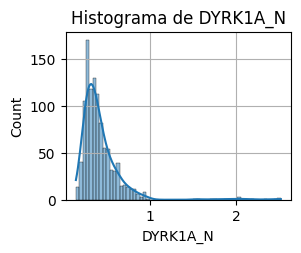

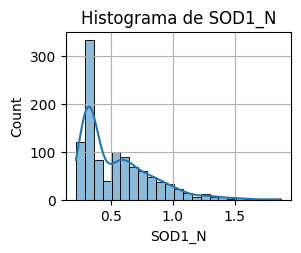

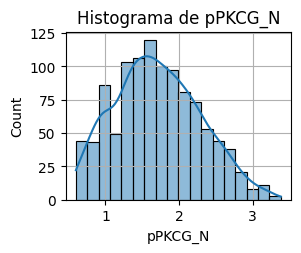

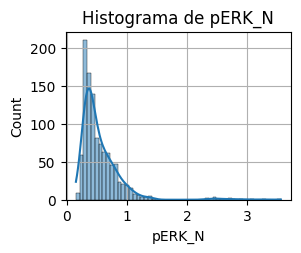

In [ ]:
# Graficar histogramas y boxplots de todas las variables

for i,column in enumerate(df_features_importance.columns):
    # Histograma
    if i==4:
      break
    plt.subplot(2,2,i+1)
    sns.histplot(data=df_features_importance[column], kde=True)
    plt.title(f"Histograma de {column}")
    plt.grid()
    plt.show()
    


Escalamiento de la data y normalización

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_features_importance.iloc[:,:-1]) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=df_features_importance.iloc[:,:-1].columns) 

normalized_df['Class']=df_features_importance.iloc[:,-1]

normalized_df

,DYRK1A_N,SOD1_N,pPKCG_N,pERK_N,CaNA_N,Class
0,0.221814,-0.437906,-0.322673,0.292273,0.754649,c-CS-m
1,0.218287,-0.437174,-0.282209,0.264726,0.781990,c-CS-m
2,0.161599,-0.342261,-0.151792,0.184059,0.894329,c-CS-m
3,0.048535,-0.519858,-0.119688,0.080277,0.840608,c-CS-m
4,0.021172,-0.433056,-0.059698,0.008828,0.899095,c-CS-m
...,...,...,...,...,...,...
1075,-0.317393,0.458094,0.739413,-0.375663,0.039458,t-SC-s
1076,-0.287025,0.517888,0.713938,-0.371704,0.039207,t-SC-s
1077,-0.388661,0.208857,0.783023,-0.414015,0.144177,t-SC-s
1078,-0.383759,0.259778,0.770337,-0.426952,0.097664,t-SC-s


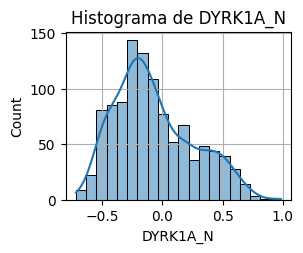

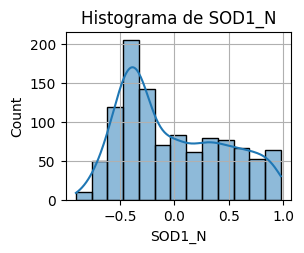

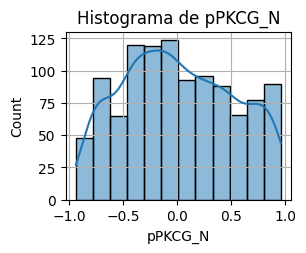

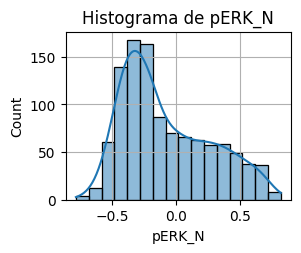

In [ ]:
# Graficar histogramas y boxplots de todas las variables

for i,column in enumerate(normalized_df.columns):
    # Histograma
    if i==4:
      break
    plt.subplot(2,2,i+1)
    sns.histplot(data=normalized_df[column], kde=True)
    plt.title(f"Histograma de {column}")
    plt.grid()
    plt.show()
    

#$Modelamiento$

In [ ]:
# Agrupación por aglomeramiento es Agglomerative Clustering en scikit learn

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5).fit(normalized_df.iloc[:,:-1])

In [ ]:
clustering.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
result,counts=np.unique(clustering.labels_, return_counts = True)

In [ ]:
# Create a DataFrame with the selected variables
df_pairplot=df_features_importance.iloc[:,:-2].copy()
df_pairplot['Cluster']=clustering.labels_
df_pairplot

,DYRK1A_N,SOD1_N,pPKCG_N,pERK_N,Cluster
0,0.503644,0.369510,1.443091,0.687906,2
1,0.514617,0.342279,1.439460,0.695006,2
2,0.509183,0.343696,1.524364,0.677348,2
3,0.442107,0.344509,1.612382,0.583277,2
4,0.434940,0.329126,1.645807,0.550960,2
...,...,...,...,...,...
1075,0.254860,0.820078,2.630825,0.265642,1
1076,0.272198,0.854258,2.593227,0.270378,1
1077,0.228700,0.661809,2.628286,0.255045,1
1078,0.221242,0.698413,2.659706,0.230649,1


Gráficos finales del clustering

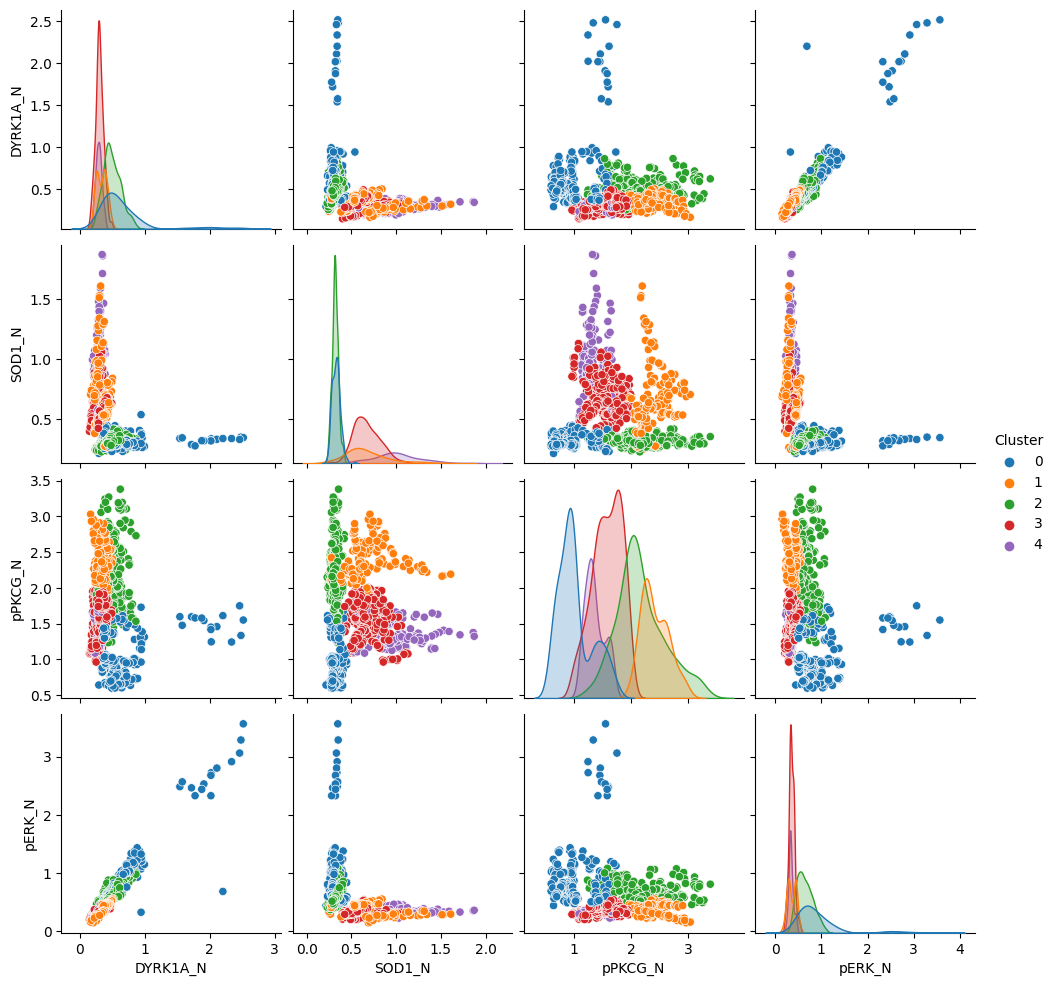

In [ ]:
# Create the pairplot
sns.pairplot(df_pairplot,hue='Cluster',palette='tab10')
plt.show()

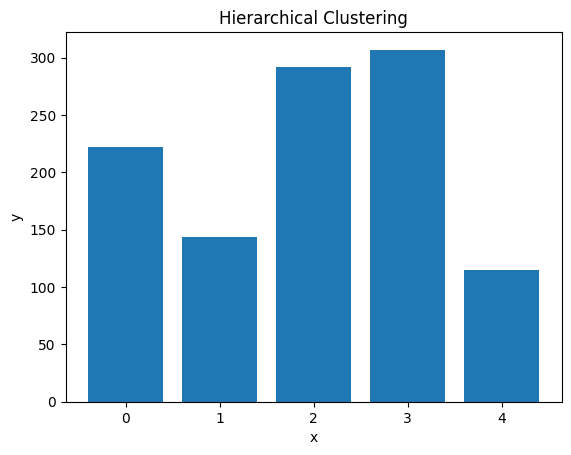

In [ ]:
# Plot the clustering result
plt.bar(result,counts)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hierarchical Clustering')
plt.show()

## $Discusión$$:$

A partir de los resultados del clustering se puede ver que al incluir 5 clusters, la agrupación de las instancias del conjunto de datos está "balanceada" o al menos a simple vista no hay un desbalance marcado de los conjuntos.

La normalización redujo los outliers que se veían en la distribución de algunas variables seleccionadas a partir del Feature Importance